## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [2]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


In [51]:
function lennardjones_eq(S::AbstractString)
    T(r, at) = trace(stress(lennardjones(r0=r), at))
    at = JuLIP.ASE.bulk(S, cubic=true, pbc=true)
    r0 = rnn("Al")
    r1 = r0 - 0.1
    s0, s1 = T(r0, at), T(r1, at)
    while (abs(s1) > 1e-8) && abs(r0 - r1) > 1e-8
        rnew = (r0 * s1 - r1 * s0) / (s1 - s0)
        r0, r1 = r1, rnew
        s0, s1 = s1, T(rnew, at)
    end
    return lennardjones(r0=r1)
end 

# V = lennardjones_eq("Al")
# at = JuLIP.ASE.bulk("Al", cubic=true, pbc=true)
# stress(V, at)

3×3 StaticArrays.SMatrix{3,3,Float64,9}:
 -8.26114e-12  -1.76266e-19  -1.39707e-18
 -1.76266e-19  -8.26111e-12  -7.05065e-19
 -1.39707e-18  -7.05065e-19  -8.26103e-12

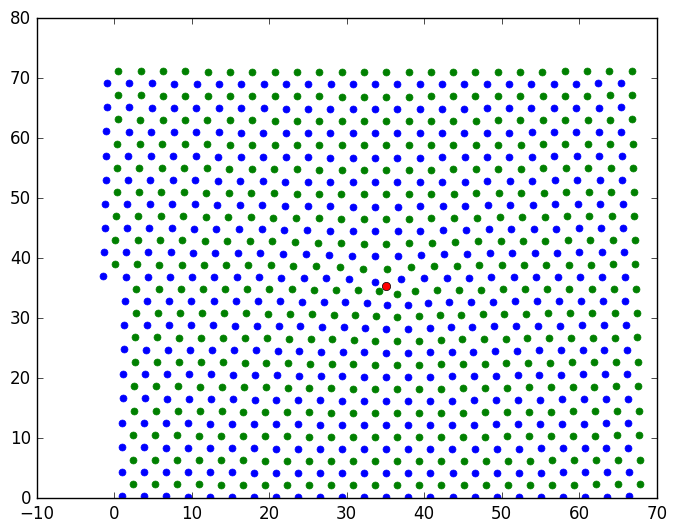

 a : 4.05xc: 33.64944394971482 yc: 35.4375 minimum index : [414,451] minimum : 1.5377343749999917I0 = 451
X12[I0] = [34.3654,36.45]
xcore = [35.0813,35.4375]


3×864 Array{Float64,2}:
 0.931163  2.36817  0.965915  2.40564  …  66.8028   65.3425  66.7709 
 0.394039  2.4154   4.46249   6.48537     67.2051   69.2087  71.239  
 0.0       1.43189  0.0       1.43189      1.43189   0.0      1.43189

In [62]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
calc = lennardjones_eq("Al")
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 10.1, 
            truncate=false, cle=:anisotropic, calc = calc,zDir=1, eos_correction=true)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat

 a : 4.05

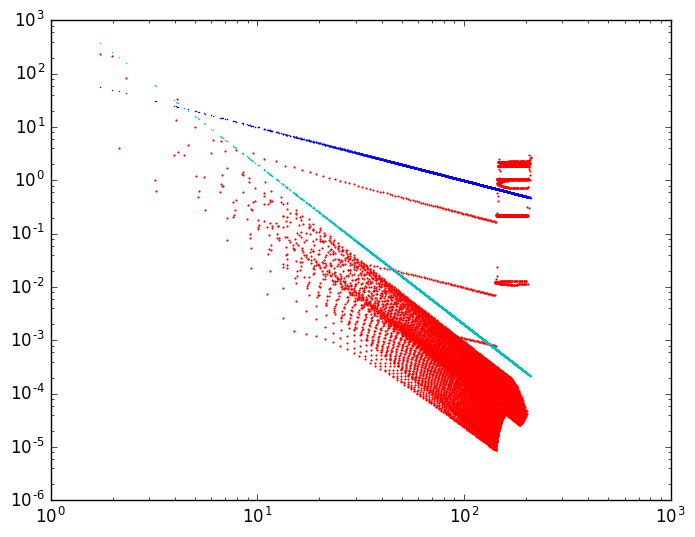

xc: 148.20074250193557 yc: 148.83749999999998 minimum index : [7622,7771] minimum : 1.53773437499998I0 = 7771
X12[I0] = [148.917,149.85]
xcore = [149.633,148.838]


2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x344a032d0>
 PyObject <matplotlib.lines.Line2D object at 0x33bbf2350>

In [63]:
## anisotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones_eq("Al")
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 50.1, 
                truncate=false, cle=:anisotropic, calc = calc)
set_calculator!(at, calc)
xcore = [xcore[1], xcore[2],0] #append a zero to xcore
r = [norm(x - xcore) for x in positions(at)]
f = [norm(g) for g in forces(at)]
loglog(r,f, "r.", markersize=2)
loglog(r,1e2 * r.^(-1), "b.", r,2e3 * r.^(-3), "c.", markersize=1)

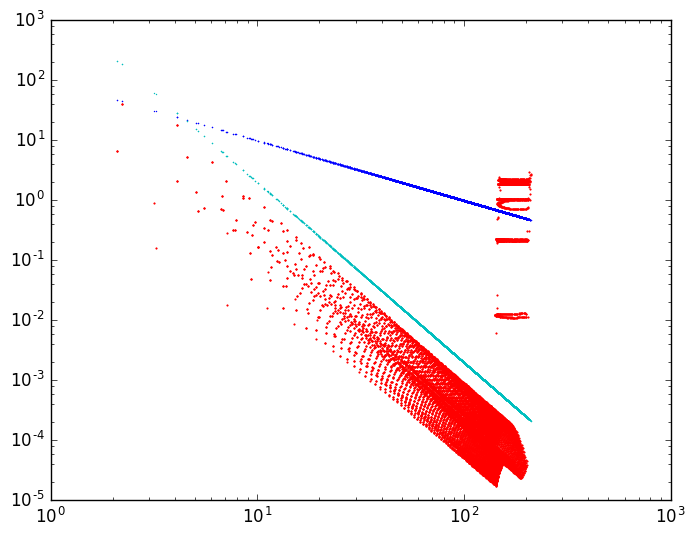

 a : 4.05xc: 148.20074250193557 yc: 148.83749999999998 minimum index : [7622,7771] minimum : 1.53773437499998I0 = 7771
X12[I0] = [148.917,149.85]
xcore = [149.633,148.838]


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33f1e5410>

In [65]:
## anisotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones_eq("Al")
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 50.1, 
                truncate=false, cle=:anisotropic, calc = calc, eos_correction = true)
set_calculator!(at, calc)
xcore = [xcore[1], xcore[2],0] #append a zero to xcore
r = [norm(x - xcore) for x in positions(at)]
f = [norm(g) for g in forces(at)]
loglog(r,f, "r.", markersize=2)
loglog(r,1e2 * r.^(-1), "b.", markersize=1)
loglog(r, 2e3 * r.^(-3), "c.", markersize=1)
